In [3]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk import ngrams
from nltk import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer
from sklearn import metrics
import nltk
nltk.download('punkt')
nltk.download('all')


[nltk_data] Downloading package punkt to C:\Users\Ageng
[nltk_data]     Ganteng\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Ageng
[nltk_data]    |     Ganteng\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Ageng
[nltk_data]    |     Ganteng\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Ageng
[nltk_data]    |     Ganteng\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Ageng
[nltk_data]    |     Ganteng\AppData\Roaming\nltk_data...
[nltk_

True

In [4]:
!python -m nltk.downloader punkt

c:\Users\Ageng Ganteng\AppData\Local\Programs\Python\Python310\lib\runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to C:\Users\Ageng
[nltk_data]     Ganteng\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
df = pd.read_csv("C:/Users/Ageng Ganteng/Desktop/PRAKTIKUM_1/Bahan data/ISEAR.csv",header=None)
df.head()

,0,1,2
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [6]:
col = [0,1]
new_df = df[col]
new_df = new_df[pd.notnull(df[1])]
new_df.columns = ['Emotion','Text']
new_df.head()


,Emotion,Text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


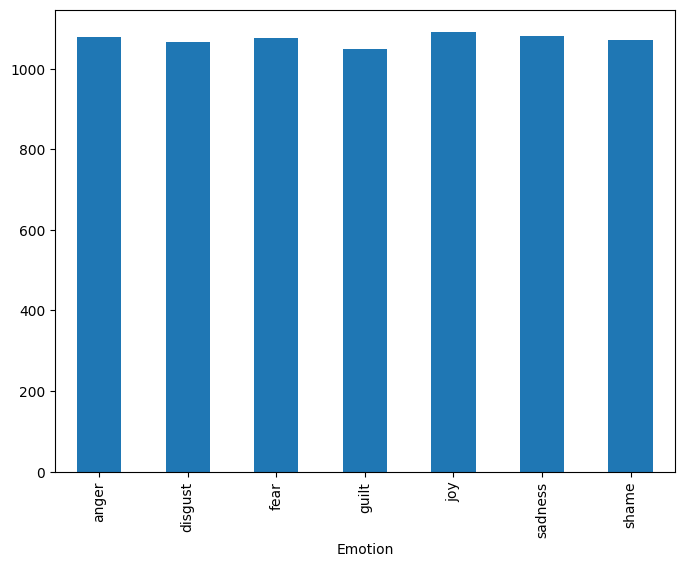

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
new_df.groupby('Emotion').Text.count().plot.bar(ylim=0)
plt.show()

In [8]:
new_df['Text']
new_df['Emotion']

0           joy
1          fear
2         anger
3       sadness
4       disgust
         ...   
7511      shame
7512      shame
7513       fear
7514      guilt
7515       fear
Name: Emotion, Length: 7516, dtype: object

In [9]:
def getTokenizedList(input_df):
    tokenizedList=[]
    for i in range(0, len(input_df)):
        curText = input_df['Text'].iloc[i]
        curText = curText.replace('\n','')
        curTokenized=word_tokenize(curText)
        tokenizedList.append(curTokenized)
    #print(tokenizedList)

    tokenziedListWithoutPunct=[]
    punctList=list(string.punctuation)
    for i in range(0, len(tokenizedList)):
        curList=tokenizedList[i]
        newList=[] #list without stopwords
        for word in curList:
            if (word.lower() not in punctList):
                newList.append(word.lower())
        tokenziedListWithoutPunct.append(newList)

    #print(tokenziedListWithoutPunct)
#Stemming
    mystemmer=PorterStemmer()
    tokenziedStemmed=[]
    for i in range(0,len(tokenziedListWithoutPunct)):
        curList=tokenziedListWithoutPunct[i]
        newList=[]
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenziedStemmed.append(newList)
    return tokenziedStemmed

In [10]:
def transformSentence(sent):
    s = []
    sent=sent.replace('\n','')
    sentTokenized=word_tokenize(sent)
    s.append (sentTokenized)
    sWithoutPunct = []
    punctList = list(string.punctuation)
    curSentList = s[0]
    newSentList = []
    for word in curSentList:
        if (word.lower() not in punctList):
            newSentList.append(word.lower())
    sWithoutPunct.append(newSentList)
    mystemmer = PorterStemmer()
    tokenziedStemmed = []
    for i in range(0,len(sWithoutPunct)):
        curList=sWithoutPunct[i]
        newList=[]
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenziedStemmed.append(newList)
    return tokenziedStemmed

In [11]:
new_df['Text']=getTokenizedList(new_df)
#new_df['Text']

In [12]:
X_train, X_test, Y_train, Y_test=train_test_split(new_df['Text'],new_df['Emotion'], test_size=.3,random_state=1)

In [13]:
#Function to pass the list to the Tfidf vectorizer
def returnPhrase(inputList):
    return inputList

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix  # Import a sparse matrix format

myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3), max_features=5000)
myVectorizer.fit(X_train)
transformedTrain=myVectorizer.transform(X_train).toarray()
transformedTest=myVectorizer.transform(X_test).toarray()
# Use a sparse matrix format
transformedTrain = csr_matrix(myVectorizer.transform(X_train))
transformedTest = csr_matrix(myVectorizer.transform(X_test))


In [17]:
curAlpha=0.33 #smoothing factor in NB
NBClassifier=MultinomialNB(alpha=curAlpha)
NBClassifier.fit(transformedTrain,Y_train)
myPredTest=NBClassifier.predict(transformedTest)
print('Best Acc Naive Bayes')
#print (curAlpha)
print(np.sum(myPredTest==Y_test)/len(Y_test))

Best Acc Naive Bayes
0.5773835920177384


In [18]:
print('Metrics Classification Report : Naive Bayes')
print(metrics.classification_report(Y_test, myPredTest))

Metrics Classification Report : Naive Bayes
              precision    recall  f1-score   support

       anger       0.49      0.49      0.49       331
     disgust       0.60      0.61      0.60       324
        fear       0.64      0.67      0.65       311
       guilt       0.45      0.56      0.50       299
         joy       0.69      0.65      0.67       323
     sadness       0.70      0.60      0.65       351
       shame       0.51      0.46      0.48       316

    accuracy                           0.58      2255
   macro avg       0.58      0.58      0.58      2255
weighted avg       0.58      0.58      0.58      2255



In [19]:
curC=2    #cost factor in SVM
SVMClassifier=svm.LinearSVC(C=curC)
SVMClassifier.fit(transformedTrain,Y_train)
myPredTest=SVMClassifier.predict(transformedTest)
print('Best Acc SVM')
#print (curC)
print(np.sum(myPredTest==Y_test)/len(Y_test))

Best Acc SVM
0.5627494456762749


In [20]:
print('Metrics Classification Report : SVM')
print(metrics. classification_report(Y_test, myPredTest))

Metrics Classification Report : SVM
              precision    recall  f1-score   support

       anger       0.46      0.49      0.47       331
     disgust       0.56      0.54      0.55       324
        fear       0.64      0.65      0.64       311
       guilt       0.45      0.50      0.48       299
         joy       0.70      0.68      0.69       323
     sadness       0.65      0.63      0.64       351
       shame       0.48      0.45      0.46       316

    accuracy                           0.56      2255
   macro avg       0.56      0.56      0.56      2255
weighted avg       0.57      0.56      0.56      2255



In [21]:
#To predict the emotion of a sentence using Naive Bayes
def predictSentNB(sent):
    sentPred = NBClassifier.predict(myVectorizer. transform(transformSentence(sent)).toarray())
    return sentPred

In [22]:
#To predict the emotion of a sentence using Naive Bayes
def predictSentSVM(sent):
    sentPred = SVMClassifier.predict(myVectorizer. transform(transformSentence(sent)).toarray())
    return sentPred

In [23]:
sent = "I love you to the moon and back"

#Printing the predicted emotion
print("Navie bayes prediction")
print(predictSentNB(sent))
print("SVM prediction")
print(predictSentSVM(sent))

Navie bayes prediction
['joy']
SVM prediction
['joy']


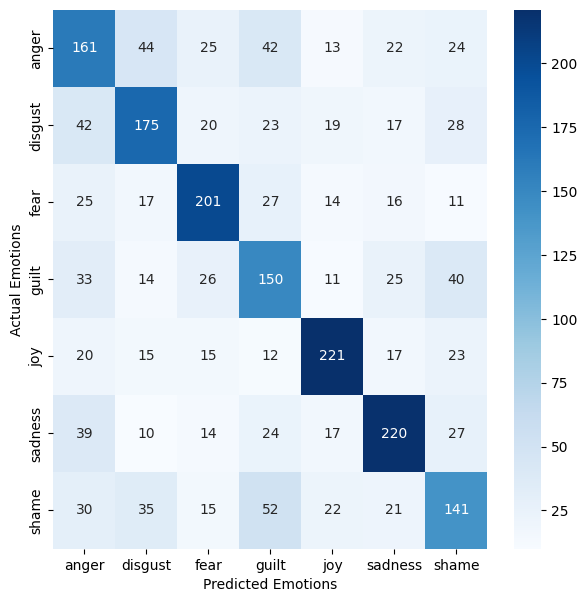

In [24]:
#printing the Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt # Import matplotlib for plotting

labels = ['anger','disgust','fear','guilt','joy','sadness','shame']
cm = confusion_matrix(Y_test, myPredTest, labels=labels) # Pass labels as a keyword argument
#print(cm)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True,fmt='d',
            xticklabels=labels, yticklabels=labels,cmap='Blues')
plt.ylabel('Actual Emotions')
plt.xlabel('Predicted Emotions')
plt.show()